## Assignment 2 on ML 1 ...... ITI

## `Telco Customer Churn `
**The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.**

#### GitHub: https://github.com/AGOOR97/Telco_Customer_Churn 

### > Important Notes :
####  `1. this NoteBook is explainig every step by comments and Markdowns in each cell` 
####  `2. please do not jump below , read this Notebook cell by cell to understand what i am doing ` 
####  `3.  read my comments carefully,i am using some tricks (every thing is explained with comments)` 
####  `3. finally after reading all Notebook , you will be satisfied isa`

### <a> Our Team </a>
### <a> 1. Mohammed AL-Sayed Agoor </a>
### <a> 2. Ahmed Essam Azab </a>
### <a> 3. Mohammed Hatem Radwan </a>
### <a> 4. Saad Eldin Reda Abdallah </a>

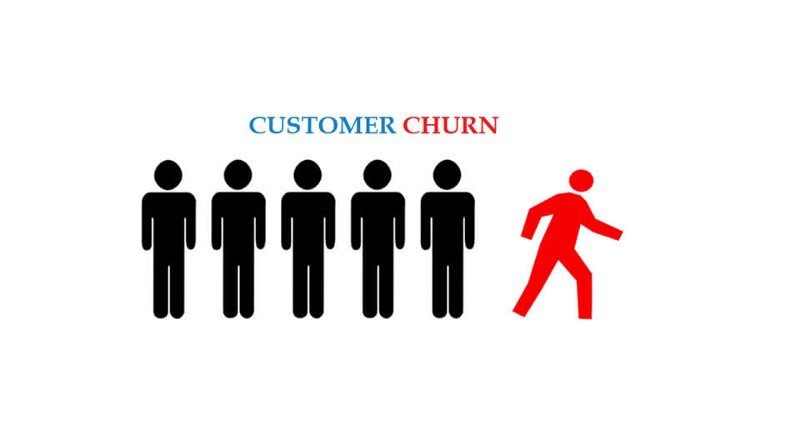

----------

In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

# other
import missingno as msno
import os
import joblib
import tarfile
import urllib

## SKlearn
import xgboost as xgb
from sklearn import datasets

# Metrics
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, confusion_matrix

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

## Load the Data and Look at the big Picture
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

`Features`
* CustomerID: A unique ID that identifies each customer.

* Gender: The customer’s gender: Male, Female

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Partner :

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be     children, parents, grandparents, etc.

* Tenure in Months: Indicates the total amount of months that the customer has been with the company

* PhoneService : Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.


`target`
* Churn : Customers who left within the last month

In [2]:
## read the csv data
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
### describe the data , look at its datatypes
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn.describe() ## describe ypur data

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning

In [5]:
## this is numerical but contains some nulls so it leads to be an object
## fill null with Nans and convert to float64
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn['TotalCharges'].dtype

dtype('float64')

In [6]:
churn.info()  ## check dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## check for unique values in object columns

### i only define this code as function because i will need it later
def categ_cols():
    for col in churn.columns:
        if churn[col].dtype=='object':
            print(f'column name is "{col}" \n', churn[col].unique())
            print('==='*15)

categ_cols()

column name is "customerID" 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column name is "gender" 
 ['Female' 'Male']
column name is "Partner" 
 ['Yes' 'No']
column name is "Dependents" 
 ['No' 'Yes']
column name is "PhoneService" 
 ['No' 'Yes']
column name is "MultipleLines" 
 ['No phone service' 'No' 'Yes']
column name is "InternetService" 
 ['DSL' 'Fiber optic' 'No']
column name is "OnlineSecurity" 
 ['No' 'Yes' 'No internet service']
column name is "OnlineBackup" 
 ['Yes' 'No' 'No internet service']
column name is "DeviceProtection" 
 ['No' 'Yes' 'No internet service']
column name is "TechSupport" 
 ['No' 'Yes' 'No internet service']
column name is "StreamingTV" 
 ['No' 'Yes' 'No internet service']
column name is "StreamingMovies" 
 ['No' 'Yes' 'No internet service']
column name is "Contract" 
 ['Month-to-month' 'One year' 'Two year']
column name is "PaperlessBilling" 
 ['Yes' 'No']
column name is "PaymentMethod" 
 ['Electronic check' 'Maile

In [8]:
## Check for nulls
churn.isnull().sum().sort_values(ascending=False)

## TotalCharges .... 11 >> nulls , after we convert its datatypes ot be float 

TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
gender               0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
dtype: int64

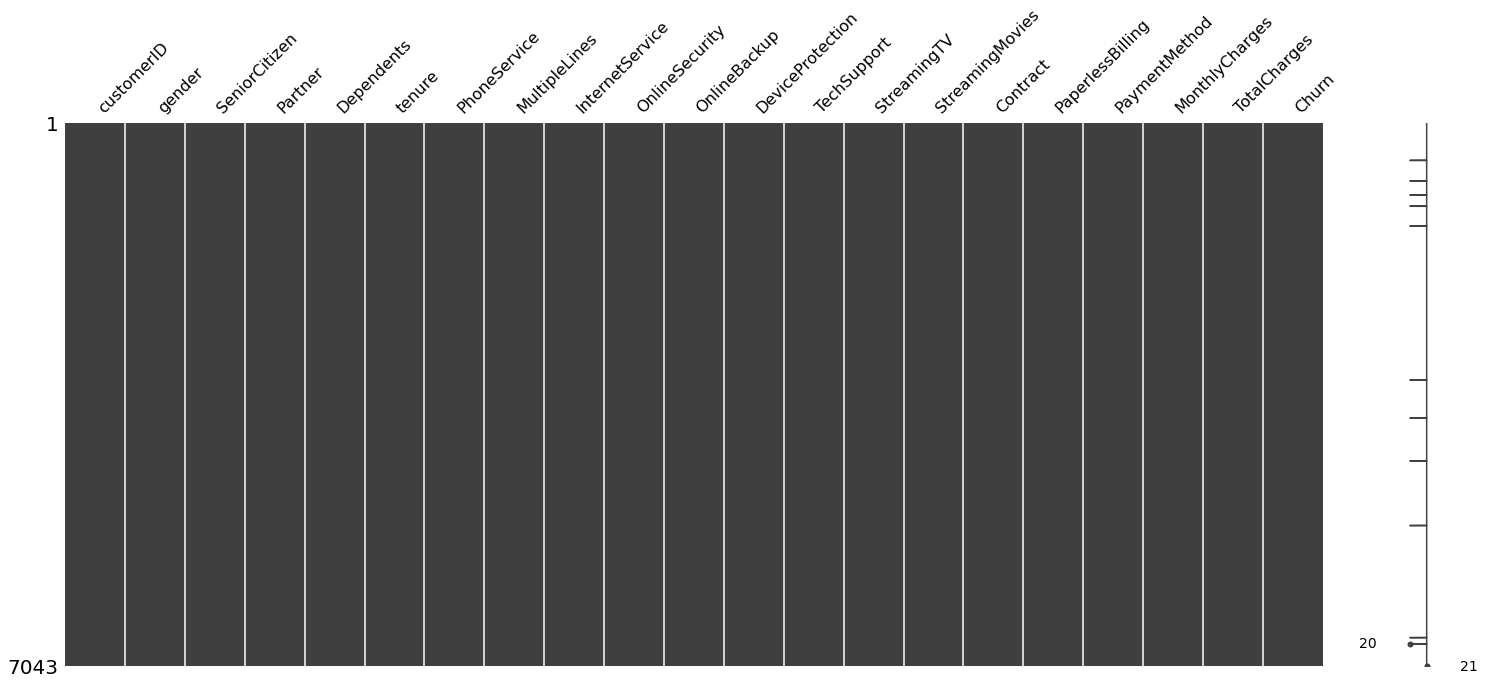

In [9]:
## check by missingno
msno.matrix(churn);

In [10]:
### drop these 11 nulls 
churn.dropna(axis=0, inplace=True)

## Check for nulls
churn.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [11]:
churn.info()  ## check dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


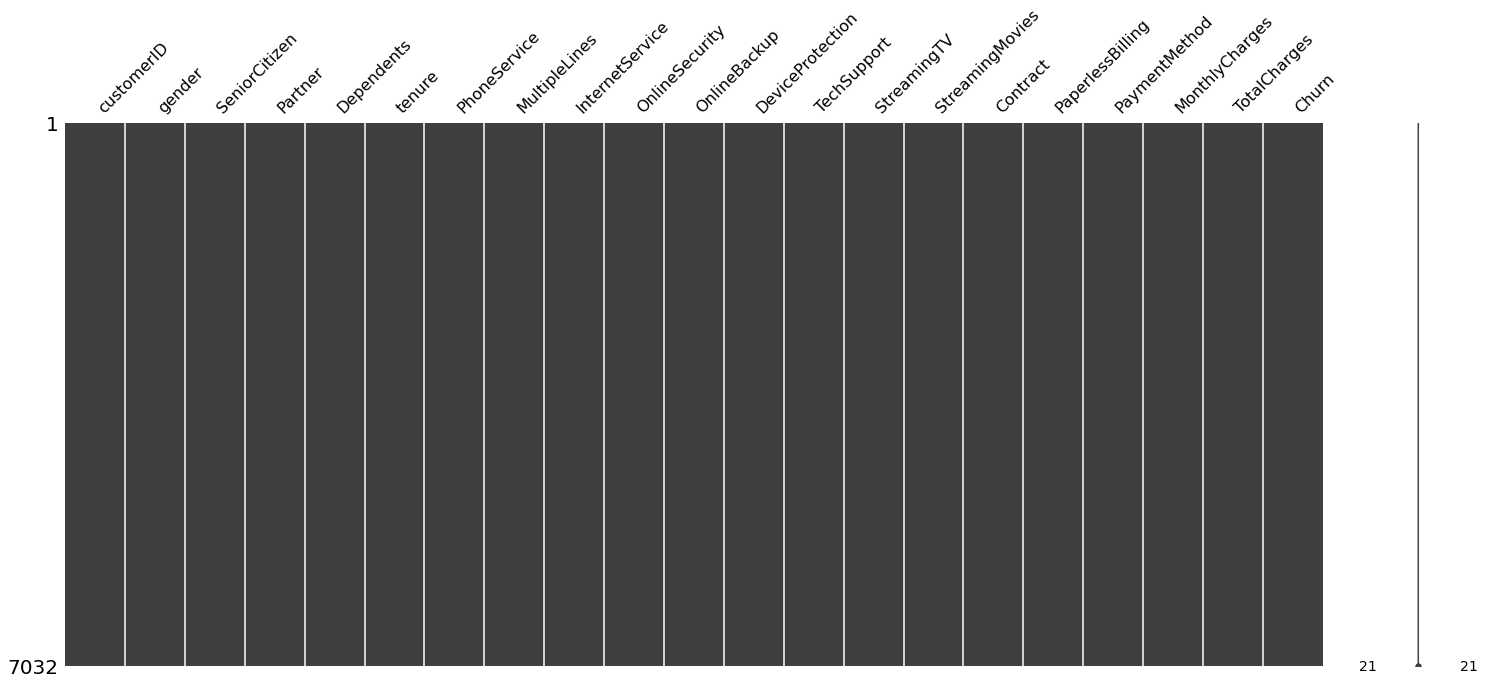

In [12]:
## check by missingno
msno.matrix(churn);

## Data Exploration and EDA

In [13]:
## take a copy
churn_copy = churn.copy()

churn_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


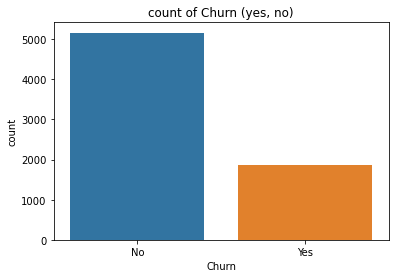

In [14]:
## show the countplot of churn 
sns.countplot(x='Churn', data=churn_copy) 
plt.title('count of Churn (yes, no)');   ## it looks like that 'No' is the biggest

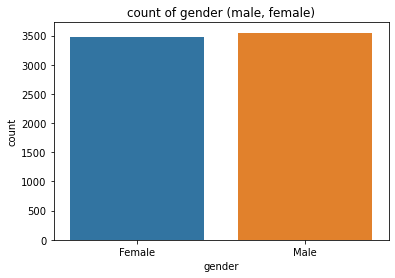

In [15]:
## show the counplot for each gender
sns.countplot(x='gender', data=churn_copy)   
plt.title('count of gender (male, female)'); ## almost the same ratio >> good

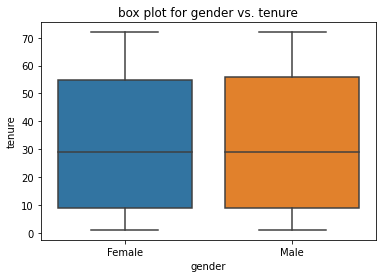

In [16]:
## show the boxplot of each gender to the tenure(months of services)
sns.boxplot(x='gender', y='tenure', data=churn_copy)
plt.title('box plot for gender vs. tenure');  ## almost the same ratio >> good

gender_partner => 
 Partner    No   Yes
gender             
Female   1800  1683
Male     1839  1710


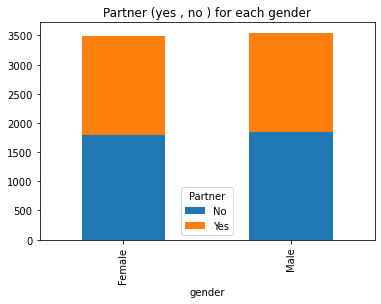

In [17]:
## Partner (yes , no ) for each gender
gender_partner = churn_copy.groupby(['gender', 'Partner']).size().unstack()

print('gender_partner => \n', gender_partner)
print('==='*15)

gender_partner.plot(stacked=True, kind='bar')
plt.title('Partner (yes , no ) for each gender');   ## ok

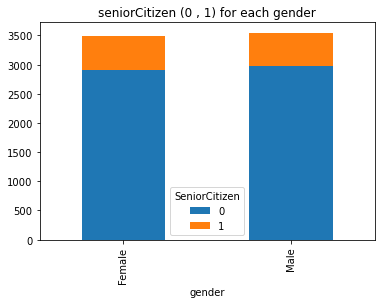

In [18]:
## seniorCitizen (0 , 1) for each gender
gender_seniorCitizen = churn_copy.groupby(['gender', 'SeniorCitizen']).size().unstack()

gender_seniorCitizen.plot(stacked=True, kind='bar')
plt.title('seniorCitizen (0 , 1) for each gender'); ## ok

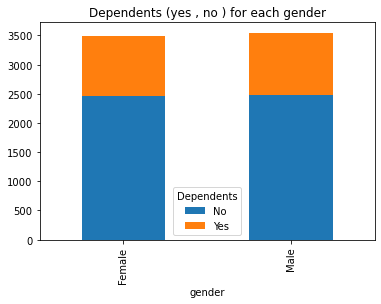

In [19]:
## Partner (yes , no ) for each gender
gender_dependents = churn_copy.groupby(['gender', 'Dependents']).size().unstack()

gender_dependents.plot(stacked=True, kind='bar')
plt.title('Dependents (yes , no ) for each gender'); ## ok

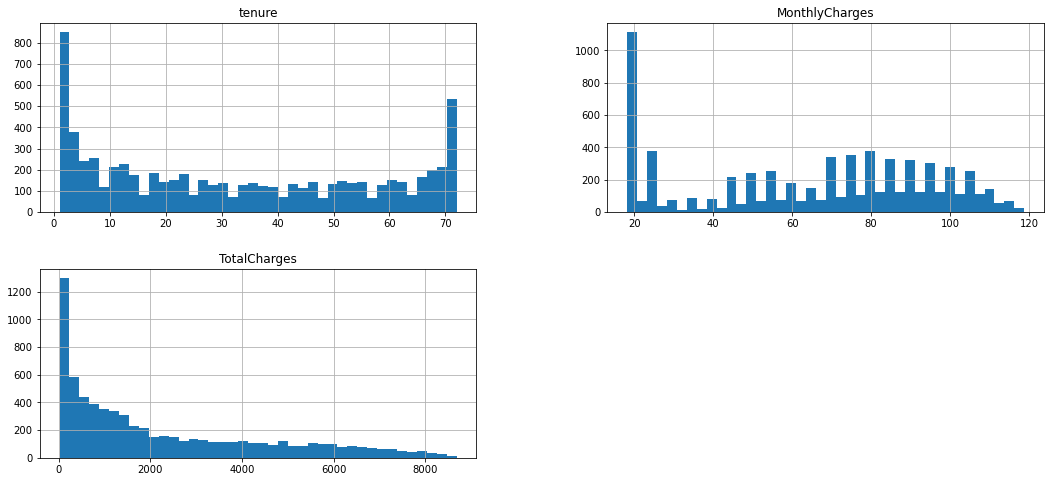

In [20]:
## tenure and MonthlyCharges and TotalCharges historam ditribution
churn_copy[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=40, figsize=(18, 8));

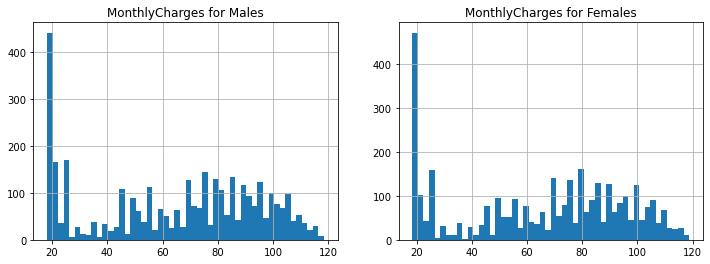

In [21]:
### get the distibution of MonthlyCharges for each gender alone
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
churn_copy[churn_copy['gender']=='Male']['MonthlyCharges'].hist(bins=50)
plt.title('MonthlyCharges for Males')

plt.sca(ax[1])
churn_copy[churn_copy['gender']=='Female']['MonthlyCharges'].hist(bins=50)
plt.title('MonthlyCharges for Females');   ## Distribution is almost the same >> ok

In [22]:
## call the categorical column function 
categ_cols()

column name is "customerID" 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column name is "gender" 
 ['Female' 'Male']
column name is "Partner" 
 ['Yes' 'No']
column name is "Dependents" 
 ['No' 'Yes']
column name is "PhoneService" 
 ['No' 'Yes']
column name is "MultipleLines" 
 ['No phone service' 'No' 'Yes']
column name is "InternetService" 
 ['DSL' 'Fiber optic' 'No']
column name is "OnlineSecurity" 
 ['No' 'Yes' 'No internet service']
column name is "OnlineBackup" 
 ['Yes' 'No' 'No internet service']
column name is "DeviceProtection" 
 ['No' 'Yes' 'No internet service']
column name is "TechSupport" 
 ['No' 'Yes' 'No internet service']
column name is "StreamingTV" 
 ['No' 'Yes' 'No internet service']
column name is "StreamingMovies" 
 ['No' 'Yes' 'No internet service']
column name is "Contract" 
 ['Month-to-month' 'One year' 'Two year']
column name is "PaperlessBilling" 
 ['Yes' 'No']
column name is "PaymentMethod" 
 ['Electronic check' 'Maile

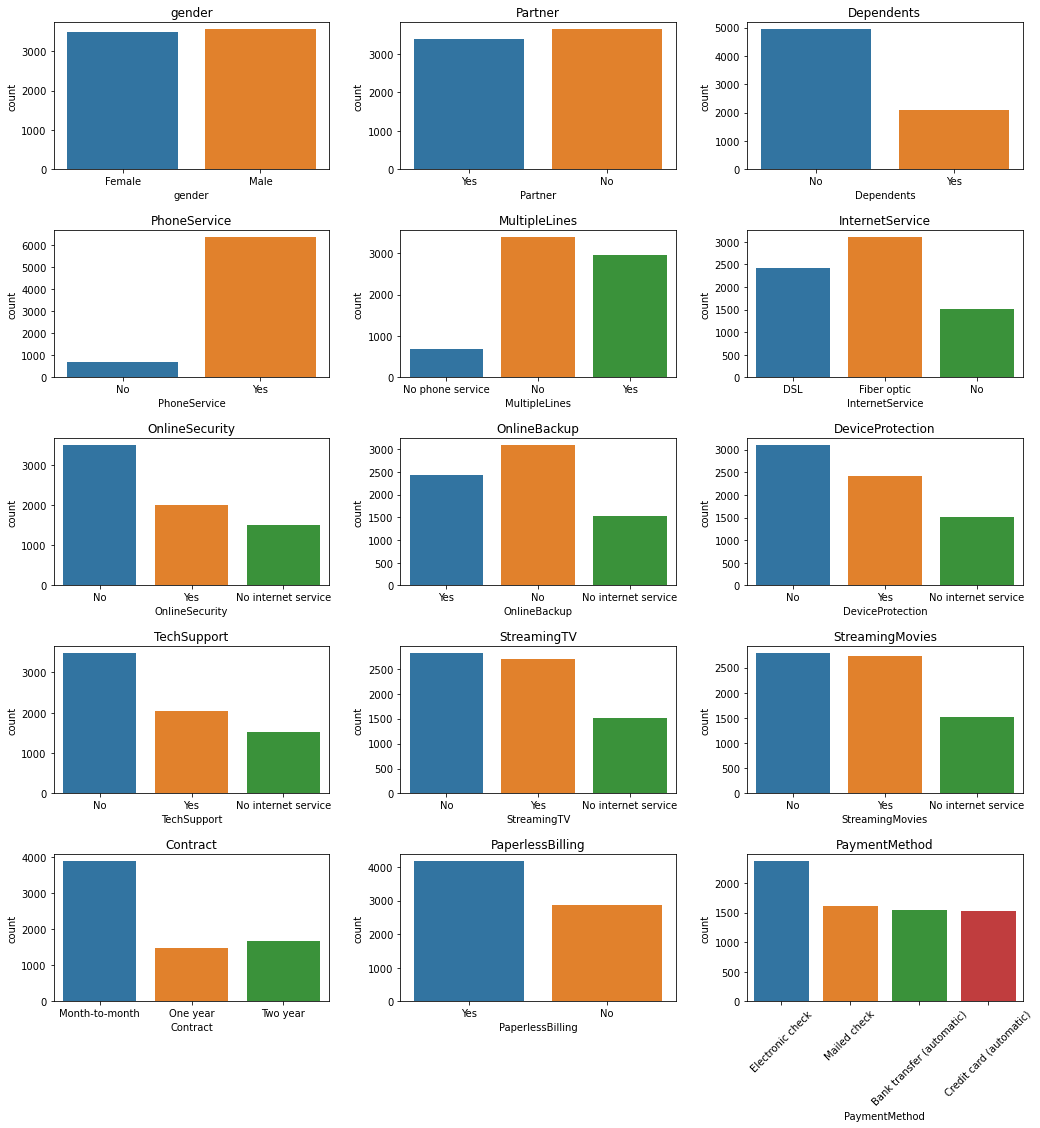

In [23]:
### plotting the countplot for all categorical columns using suplots

fig, ax = plt.subplots(5, 3, figsize=(15, 15))
fig.tight_layout(pad=4)  ## to avoid overlaping of titles in subplots (try comment it you will know)

plt.sca(ax[0,0])
sns.countplot(x='gender', data=churn_copy)
plt.title('gender')

plt.sca(ax[0,1])
sns.countplot(x='Partner', data=churn_copy)
plt.title('Partner')

plt.sca(ax[0,2])
sns.countplot(x='Dependents', data=churn_copy)
plt.title('Dependents')

plt.sca(ax[1,0])
sns.countplot(x='PhoneService', data=churn_copy)
plt.title('PhoneService')

plt.sca(ax[1,1])
sns.countplot(x='MultipleLines', data=churn_copy)
plt.title('MultipleLines')

plt.sca(ax[1,2])
sns.countplot(x='InternetService', data=churn_copy)
plt.title('InternetService')

plt.sca(ax[2,0])
sns.countplot(x='OnlineSecurity', data=churn_copy)
plt.title('OnlineSecurity')

plt.sca(ax[2,1])
sns.countplot(x='OnlineBackup', data=churn_copy)
plt.title('OnlineBackup')

plt.sca(ax[2,2])
sns.countplot(x='DeviceProtection', data=churn_copy)
plt.title('DeviceProtection')

plt.sca(ax[3,0])
sns.countplot(x='TechSupport', data=churn_copy)
plt.title('TechSupport')

plt.sca(ax[3,1])
sns.countplot(x='StreamingTV', data=churn_copy)
plt.title('StreamingTV')

plt.sca(ax[3,2])
sns.countplot(x='StreamingMovies', data=churn_copy)
plt.title('StreamingMovies')

plt.sca(ax[4,0])
sns.countplot(x='Contract', data=churn_copy)
plt.title('Contract')

plt.sca(ax[4,1])
sns.countplot(x='PaperlessBilling', data=churn_copy)
plt.title('PaperlessBilling')

plt.sca(ax[4,2])
sns.countplot(x='PaymentMethod', data=churn_copy)
plt.title('PaymentMethod')
plt.xticks(rotation=45);

### Split the Data using Stratified Method

churn_copy shape => (7032, 21)
train_set shape => (5977, 20)
test_set shape => (1055, 20)


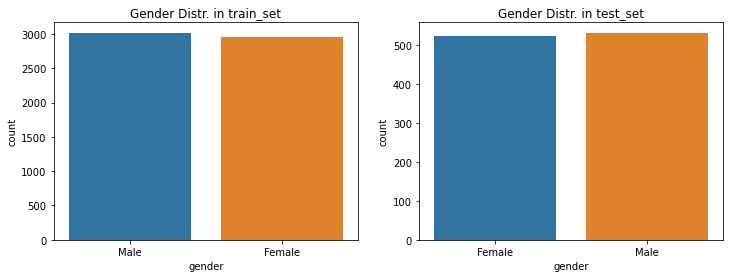

In [24]:
## i will split the data on the Gender column

## create the generator
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
gen_for_indecies = split_data.split(churn_copy, churn_copy['gender'])

for train_idx, test_idx in gen_for_indecies:
    train_set = churn_copy.iloc[train_idx]
    test_set = churn_copy.iloc[test_idx]

## for each of train and test ,>>>> drop customer_id 
train_set = train_set.drop(columns=['customerID'], axis=1)
test_set = test_set.drop(columns=['customerID'], axis=1)

print('churn_copy shape =>', churn_copy.shape)
print('=='*15)
print('train_set shape =>', train_set.shape) # 80 %
print('=='*15)
print('test_set shape =>', test_set.shape) # 20 %
print('=='*25)

## let's check our results with visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
sns.countplot(x='gender', data=train_set)
plt.title('Gender Distr. in train_set')

plt.sca(ax[1])
sns.countplot(x='gender', data=test_set)
plt.title('Gender Distr. in test_set');    ### mission complete , the same exactly what i want

## Data Preparation (train_set)

In [25]:
## split the train_set to X, y
X_train_set = train_set.drop(columns=['Churn'], axis=1)
y_train_set = train_set['Churn']

In [26]:
## separate numerical and categorical columns 

### Note :
## i will remove (SeniorCitizen) as it is categorical and encoded not a numerical value to be work on
num_cols = [cname for cname in X_train_set.columns if
                            X_train_set[cname].dtype in ['int64','float64'] 
                            and cname != 'SeniorCitizen']
                           
cols_categ = [cname for cname in X_train_set.columns if
                            X_train_set[cname].dtype == 'object']

print('num_cols =>', num_cols)
print('==='*30)
print('cols_categ => \n', cols_categ)

num_cols => ['tenure', 'MonthlyCharges', 'TotalCharges']
cols_categ => 
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [27]:
## for numerical create a numerical Pipeline

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('scaler', StandardScaler())
                        ])


## full pipeline for both categorical and numerical
full_pipeline = ColumnTransformer([
                ('numerical', num_pipeline, num_cols),
                ('categorical', OneHotEncoder(handle_unknown='ignore', sparse=False), cols_categ)])
                

X_train_set_final = full_pipeline.fit_transform(X_train_set)
X_train_set_final = pd.DataFrame(X_train_set_final)

# One-hot encoding removed index; put it back
X_train_set_final.index = X_train_set.index

## it is known that oneHotEncoder drop columns names
X_train_set_final   

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
976,-1.282845,0.166001,-0.980814,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2717,1.606935,0.923400,1.952019,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1731,-1.282845,0.156013,-0.980946,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1115,0.263798,-0.368340,-0.042921,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4968,1.444131,-0.396639,0.597755,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,-1.201442,-0.383322,-0.928523,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1449,-1.079339,-1.511930,-0.964573,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4388,-0.631627,-1.515259,-0.853982,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
443,-0.590926,-0.003790,-0.498046,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
### then i will label the output as LabelEncoder on its own 
## Note :
## here i split the encoding of X and y , i mean that

mapper = {'Yes':1, 'No':0} 
y_train_set_final = y_train_set.map(mapper)
y_train_set_final

976     1
2717    0
1731    1
1115    0
4968    0
       ..
3410    1
1449    0
4388    0
443     0
2290    1
Name: Churn, Length: 5977, dtype: int64

### Study the Correlation 

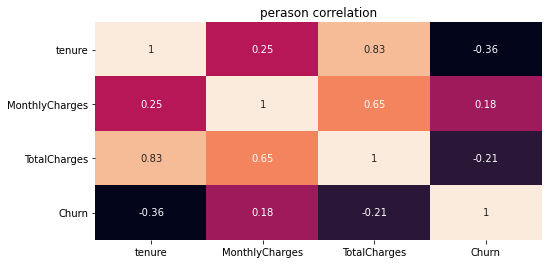

In [29]:
total = pd.DataFrame(np.c_[X_train_set_final.iloc[:, :3], y_train_set_final], 
                     columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])

plt.figure(figsize=(8, 4))
sns.heatmap(total.corr(), annot=True, cbar=False)   ## Linear correlation
plt.title('perason correlation');

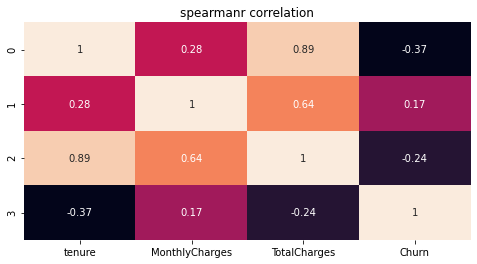

In [30]:
### get correlation coefficeint but using (spearmanr) to handle non linearity of correlation
coef_corr_spear, p_value_spear = spearmanr(X_train_set_final.iloc[:,:3], y_train_set_final)


### for correlation coeffiecnt
coef_corr_spear = pd.DataFrame(coef_corr_spear,
                              columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])

#### almost the same as perason correlation
plt.figure(figsize=(8, 4))
sns.heatmap(coef_corr_spear, annot=True, cbar=False)   ## spearmanr correlation
plt.title('spearmanr correlation');

## Model Training
#### `Choosing a Metric => (Accuracy)`

In [31]:
### some used Function in the below cells

def cross_val(model, X_train_set_final, y_train_set_final, cv=6, state=1):
    ''' this function tries to get the cross_val_score and cross_val_predict and others many things 
    Args:
    *****
     (model : Algorithm) : Classification Algorithm
     (X_train_set_final : pd.DataFrame) => training features
     (y_train_set_final : pd.DataFrame) => training target
     (cv: int) => Cross Validation Folds (default=6)
     (state : int) : Value of 1 or 2 
             1 => when the Algorithm has the (decision_function) method in cross_val_predict
             2 => when the Algorithm has the (predict_proba) method in cross_val_predict
     
     Note:
     *****
         A Famous Famous Note in sklearn (written by AGOOR)
         sklearn has three Method for (cross_val_score) {predict, predict_proba, decisison_function}
         
           => {predict_proba, decisison_function}
             most algorithms have only one of them , and some of them have both
             give the function the state 1 or 2 then the function will handle this problem
         
         to know 1 or 2 , you can try both or search ...... hope this help
         
         I hope that is clear now what this function is doing, you should also check my results
    
    '''
    print('Results : ')
    print('==========')
    print('This Model is =>', model)
    print('******'*15)
    
    ### using cross_validation for getting scores
    y_scores_cross = cross_val_score(model, X_train_set_final, y_train_set_final, 
                                     cv=cv, scoring='accuracy', n_jobs=-1)

    ### using cross_validation for getting predictions
    y_predict_cross = cross_val_predict(model, X_train_set_final, y_train_set_final, 
                                         cv=cv, method='predict', n_jobs=-1)


    ### get som info about scores
    print('y_scores_cross => \n', y_scores_cross)
    print('==='*20)
    print('y_scores_cross =>', y_scores_cross.mean())
    print('==='*20)
    print('y_scores_cross =>', y_scores_cross.std())
    print('==='*20)
    
    accuracy_model = accuracy_score(y_train_set_final, y_predict_cross)
    print('accuracy_model =>', accuracy_model)
    print('==='*20)
    
    # classification_report
    precesion_model = precision_score(y_train_set_final, y_predict_cross)
    recall_model = recall_score(y_train_set_final, y_predict_cross)
    
    print('Precision =>', precesion_model)
    print('Recall =>', recall_model)
    
    ##### Plotting
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    
    ## Confusion Matrix
    confus_model = confusion_matrix(y_train_set_final, y_predict_cross)
    
    # plot it
    plt.sca(ax[0])
    sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix')

    ### get the precision_recall_curve  and roc_auc curve
    ### (pass the true and the scores from (predict_proba or decsion_function))
    
    try:
        if state==1:
            ### using cross_validation for decision_function
            
            # for precision_recall curve
            y_decision_cross = cross_val_predict(model, X_train_set_final, y_train_set_final, 
                                                 cv=cv, method='decision_function', n_jobs=-1)
            
            precision_val, recalls_val, thresholds_vals = precision_recall_curve(y_train_set_final, 
                                                                                  y_decision_cross)
            
            ## roc_auc curve
            fpr, tpr, thresholds = roc_curve(y_train_set_final, y_decision_cross)
            print('*******'*5)
            auc = roc_auc_score(y_train_set_final, y_decision_cross)
            print('AUC = >', auc)
            print('*******'*5)

        if state==2:
            ### using cross_validation for predict_proba 
            
            # for precision_recall curve
            y_decision_cross = cross_val_predict(model, X_train_set_final, y_train_set_final, 
                                                 cv=cv, method='predict_proba', n_jobs=-1)     
            
            precision_val, recalls_val, thresholds_vals = precision_recall_curve(y_train_set_final, 
                                                                                y_decision_cross[:,1])
           
            ## roc_auc curve
            fpr, tpr, thresholds = roc_curve(y_train_set_final,  y_decision_cross[:,1])
            print('*******'*5)
            auc = roc_auc_score(y_train_set_final,  y_decision_cross[:,1])
            print('AUC = >', auc)
            print('*******'*5)
            
                
    except:
        print('check your input to this function')


    # plot precison_recall curve
    plt.sca(ax[1])
    plt.plot(thresholds_vals, precision_val[:-1], 'g-', label='Precision')
    plt.plot(thresholds_vals, recalls_val[:-1], 'b--', label='Recall')
    plt.title('Precision and Recall vs. thresholds Possible')
    plt.xlabel('Thresholds', fontsize=14)
    plt.legend()
    
    ## plot roc_curve
    plt.sca(ax[2])
    plt.plot(fpr, tpr, 'b--')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('TPR vs. FPR')
    plt.xlabel('FPR == (1-Specificity)', fontsize=14)
    plt.ylabel('FPR == (Recall)', fontsize=14)
    plt.show()

#### `try Logistic Regression`

`{'Yes':1, 'No':0}`

Results : 
This Model is => LogisticRegression(C=10, max_iter=7000, n_jobs=-1, random_state=42)
******************************************************************************************
y_scores_cross => 
 [0.80541625 0.78413655 0.81425703 0.80722892 0.79116466 0.80321285]
y_scores_cross => 0.8009027081243731
y_scores_cross => 0.010165311678603784
accuracy_model => 0.8009034632758909
Precision => 0.6502242152466368
Recall => 0.5464824120603015
***********************************
AUC = > 0.8419178274496771
***********************************


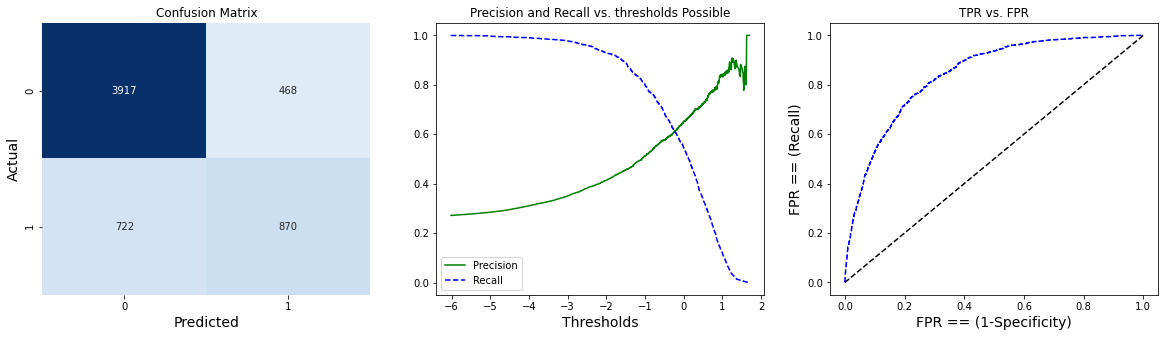

In [32]:
## try Logistic Regression
logis_clf = LogisticRegression(random_state=42, n_jobs=-1, C=10, max_iter=7000)
logis_clf.fit(X_train_set_final, y_train_set_final)

## call the cross_val Function => logistic has (decsison_function)
cross_val(logis_clf, X_train_set_final, y_train_set_final, state=1) 
## no need for tuning this model

#### `try RandomForest`

`{'Yes':1, 'No':0}`

Fitting 6 folds for each of 1 candidates, totalling 6 fits
forest_best_clf => RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=750,
                       random_state=191)
************************************************************************************************************************
Results : 
This Model is => RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=750,
                       random_state=191)
******************************************************************************************
y_scores_cross => 
 [0.79137412 0.78614458 0.81526104 0.79317269 0.80421687 0.80522088]
y_scores_cross => 0.7992316977706883
y_scores_cross => 0.009894341498029625
accuracy_model => 0.7992303831353522
Precision => 0.6655405405405406
Recall => 0.4949748743718593
***********************************
AUC = > 0.8434002968090165
***********************************


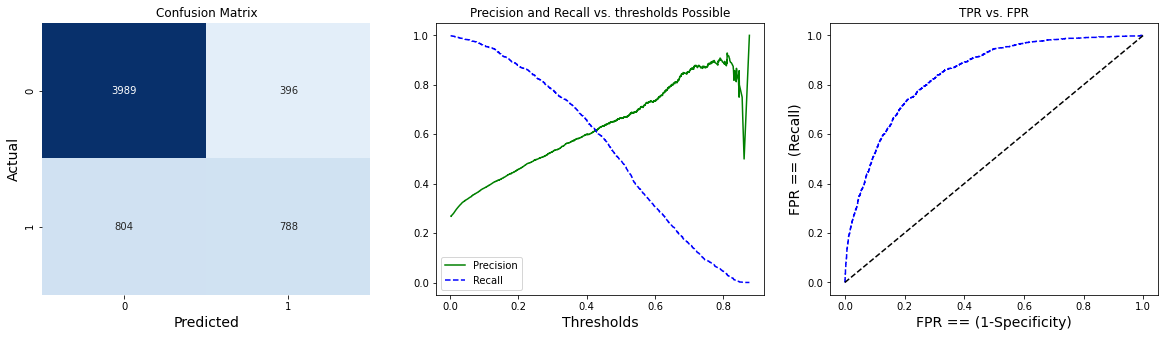

In [33]:
## try RandomForest
forest_clf = RandomForestClassifier(n_estimators=500, max_depth=5, criterion='entropy', 
                                    random_state=191)

# I tune step by step until reach to the final number in tuning gridsearch below
# I mean that these number in gridsearch passed by old gridsearches until reach them

## note that this final results of tuning, i replace the lists of searches by the final to 
## be rapidly run the algorithm
params_best_forest = {'n_estimators' : [750],
                      'max_depth' : [8]}
grid_forest_clf = GridSearchCV(forest_clf, param_grid=params_best_forest, cv=6,
                               scoring='accuracy', n_jobs=-1, verbose=6)

grid_forest_clf.fit(X_train_set_final, y_train_set_final)
forest_best_clf = grid_forest_clf.best_estimator_
print('forest_best_clf =>', forest_best_clf)
print('******'*20)

## call the cross_val Function => (forest had predict_proba)
cross_val(forest_best_clf, X_train_set_final, y_train_set_final, state=2) 

#### `try Kneighbours`

`{'Yes':1, 'No':0}`

knn_best_clf => KNeighborsClassifier(n_neighbors=28)
********************************************************************************
Results : 
This Model is => KNeighborsClassifier(n_neighbors=28)
******************************************************************************************
y_scores_cross => 
 [0.7893681  0.79216867 0.80421687 0.80722892 0.78212851 0.7811245 ]
y_scores_cross => 0.7927059290320763
y_scores_cross => 0.010007162543008916
accuracy_model => 0.7927053705872511
Precision => 0.6263421617752326
Recall => 0.5496231155778895
***********************************
AUC = > 0.830953370042917
***********************************


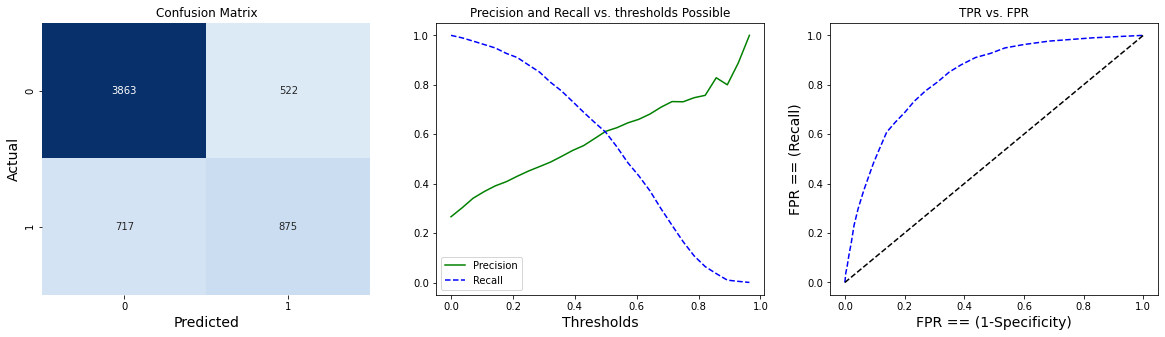

In [34]:
## try RandomForest
knn_clf = KNeighborsClassifier(n_neighbors=5)

## Tuning
## note that this final results of tuning, i replace the lists of searches by the final to 
## be rapidly run the algorithm
params_best_knn = {'n_neighbors': [28]}
grid_knn_clf = GridSearchCV(knn_clf, param_grid=params_best_knn, cv=6, scoring='accuracy', n_jobs=-1)
grid_knn_clf.fit(X_train_set_final, y_train_set_final)

knn_best_clf = grid_knn_clf.best_estimator_
print('knn_best_clf =>', knn_best_clf)
print('****'*20)

## call the cross_val Function, (knn had predict_proba)
cross_val(knn_best_clf, X_train_set_final, y_train_set_final, state=2) 

#### `try Adaboost`

`{'Yes':1, 'No':0}`

adaboost_best_clf => AdaBoostClassifier(n_estimators=150)
********************************************************************************
Results : 
This Model is => AdaBoostClassifier(n_estimators=150)
******************************************************************************************
y_scores_cross => 
 [0.79338014 0.78815261 0.82228916 0.78714859 0.80321285 0.79317269]
y_scores_cross => 0.7978926740059537
y_scores_cross => 0.012086065932040755
accuracy_model => 0.7978919190229212
Precision => 0.6507064364207221
Recall => 0.5207286432160804
***********************************
AUC = > 0.8379162058869032
***********************************


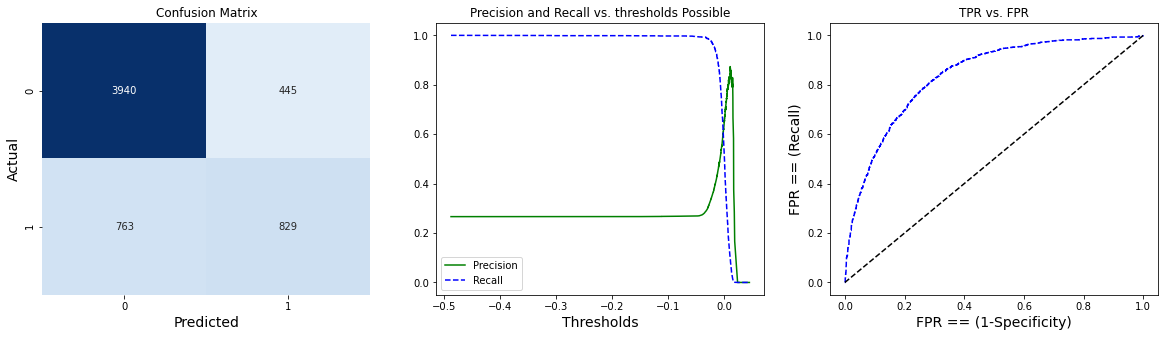

In [35]:
## try Adaboost
adaboost_clf = AdaBoostClassifier()


# Tuning
params_best_adaboost = {'n_estimators': np.arange(50, 300, 20)}
grid_adaboost_clf = GridSearchCV(adaboost_clf, param_grid=params_best_adaboost, 
                                 cv=6, scoring='accuracy', n_jobs=-1)
                                 
grid_adaboost_clf.fit(X_train_set_final, y_train_set_final)
adaboost_best_clf = grid_adaboost_clf.best_estimator_
print('adaboost_best_clf =>', adaboost_best_clf)
print('****'*20)

## call the cross_val Function, logistic has (decsison_function)
cross_val(adaboost_best_clf, X_train_set_final, y_train_set_final, state=1) 

#### `try Xgboost`

`{'Yes':1, 'No':0}`

[14:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 6 folds for each of 1 candidates, totalling 6 fits
[14:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb_best_clf => XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=

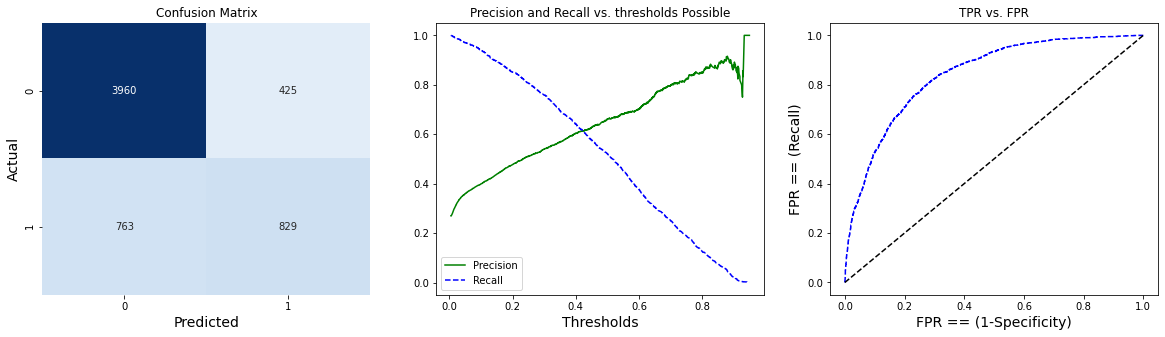

In [36]:
## try xgb
## for only appearing warning it tells to cancell it >> (use_label_encoder=False)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False)

xgb_clf.fit(X_train_set_final, y_train_set_final)

## Hyperparameters Tuning  (with some trials add and delte unitl i finished tuning)
params_best_xgb = {'learning_rate': [0.01],
                  'n_estimators': [700],
                  'max_depth': [5],
                  'booster': ['gbtree'],
                  'objective': ['binary:logistic']}

### using GridSearchCV
grid_xgb = GridSearchCV(xgb_clf, param_grid=params_best_xgb, cv=6, 
                        scoring='accuracy', n_jobs=-1, verbose=2)

grid_xgb.fit(X_train_set_final, y_train_set_final)

## best model
xgb_best_clf = grid_xgb.best_estimator_

print('xgb_best_clf =>', xgb_best_clf)
print('=='*20)

## call the cross_val Function
cross_val(xgb_best_clf, X_train_set_final, y_train_set_final, state=2) 

#### `finally VotingClassifier`

`{'Yes':1, 'No':0}`

[14:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results : 
This Model is => VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=10, max_iter=7000, n_jobs=-1,
                                                 random_state=42)),
                             ('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     n_estimators=750,
                                                     random_state=191)),
                             ('knn', KNeighborsClassifier(n_neighbors=28)),
                             ('adaboost', AdaBoostClassifier(n_estimato

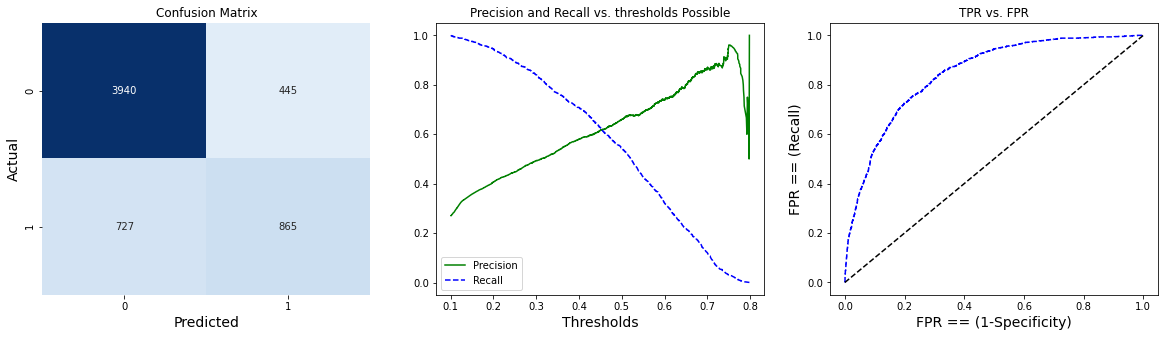

In [37]:
## try VotingClassifier
voting_clf = VotingClassifier([
                                ('logistic', logis_clf),
                                ('forest', forest_best_clf),
                                ('knn', knn_best_clf),
                                ('adaboost', adaboost_best_clf),
                                ('xgboost', xgb_best_clf)],
                                voting='soft')

voting_clf.fit(X_train_set_final, y_train_set_final)

## call the cross_val Function
cross_val(voting_clf, X_train_set_final, y_train_set_final, state=2) 

### Saving all these Models to my computer

In [38]:
### save these models
joblib.dump(logis_clf, 'logis_clf.pkl')

['logis_clf.pkl']

In [39]:
joblib.dump(forest_best_clf, 'forest_best_clf.pkl')

['forest_best_clf.pkl']

In [40]:
joblib.dump(knn_best_clf, 'knn_best_clf.pkl')

['knn_best_clf.pkl']

In [41]:
joblib.dump(adaboost_best_clf, 'adaboost_best_clf.pkl')

['adaboost_best_clf.pkl']

In [42]:
joblib.dump(xgb_best_clf, 'xgb_best_clf.pkl')

['xgb_best_clf.pkl']

In [43]:
joblib.dump(voting_clf, 'voting_clf.pkl')

['voting_clf.pkl']

In [44]:
### load this model >> feel free to use it now and evaluate on the test set

logis_clf_model = joblib.load('logis_clf.pkl')
forest_best_model = joblib.load('forest_best_clf.pkl')
knn_best_model = joblib.load('knn_best_clf.pkl')
adaboost_best_model = joblib.load('adaboost_best_clf.pkl')
xgb_best_model = joblib.load('xgb_best_clf.pkl')
voting_model = joblib.load('voting_clf.pkl')

## Evaluate on test_set

In [45]:
### check the test_set
test_set

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4071,Female,0,No,No,16,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,38.90,664.40,No
5761,Female,0,Yes,Yes,48,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,39.40,1978.65,No
5996,Male,0,No,No,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1253.65,No
1614,Male,0,Yes,No,67,No,No phone service,DSL,Yes,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),50.95,3521.70,No
771,Male,0,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.35,1444.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,Male,0,Yes,No,36,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.60,3366.05,No
584,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.00,61.70,No
3957,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,No,Electronic check,102.60,6296.75,No
6682,Male,0,Yes,No,69,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Two year,Yes,Mailed check,92.45,6460.55,No


In [46]:
## split the test_set to X, y
X_test_set = test_set.drop(columns=['Churn'], axis=1)
y_test_set = test_set['Churn']

In [47]:
## for numerical create a numerical Pipeline

X_test_set_final = full_pipeline.transform(X_test_set)
X_test_set_final = pd.DataFrame(X_test_set_final)

# One-hot encoding removed index; put it back
X_test_set_final.index = X_test_set.index

## it is known that oneHotEncoder drop columns names
X_test_set_final   

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
4071,-0.672328,-0.866060,-0.719139,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5761,0.630108,-0.849414,-0.140658,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5996,1.199924,-1.500278,-0.459775,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1614,1.403430,-0.464888,0.538531,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
771,-0.713029,0.946705,-0.375704,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,0.141695,0.955028,0.470020,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
584,-1.201442,-1.495284,-0.984424,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3957,1.240625,1.254659,1.759999,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6682,1.484832,0.916742,1.832097,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [48]:
### then i will label the output as LabelEncoder on its own 
## Note :
## here i split the encoding of X and y , i mean that

mapper = {'Yes':1, 'No':0} 
y_test_set_final = y_test_set.map(mapper)
y_test_set_final

4071    0
5761    0
5996    0
1614    0
771     1
       ..
6990    0
584     0
3957    0
6682    0
1317    0
Name: Churn, Length: 1055, dtype: int64

## <a> Final Prediction </a>

In [49]:
### I Will loop over all classification Algorithms , which i build above >> then take the max results

best_models = [logis_clf_model, forest_best_model, knn_best_model, 
               adaboost_best_model, xgb_best_model, voting_model]

for clf in best_models:
    clf.fit(X_train_set_final, y_train_set_final)
    
    y_pred_each_clf = clf.predict(X_test_set_final)
    print(clf.__class__.__name__, " ====>", accuracy_score(y_test_set_final, y_pred_each_clf))
    print('==='*15)

LogisticRegression  ====> 0.8180094786729858
RandomForestClassifier  ====> 0.8151658767772512
KNeighborsClassifier  ====> 0.8028436018957346
AdaBoostClassifier  ====> 0.8037914691943128
[14:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier  ====> 0.8161137440758294
[14:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier  ====> 0.8151658767772512


### `LogisticRegression  ====> 81.8% is the Highest Accuracy`

## Done